# 第三章 线性回归模型

## 3.1 线性回归

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
# 生成测试数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 创建线性回归模型
model = LinearRegression()


In [5]:
# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# 使用模型进行预测
y_pred = model.predict(X_test)

In [8]:
# 计算模型性能
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("均方误差: ", mse)
print("R^2 分数: ", r2)

均方误差:  0.9177532469714291
R^2 分数:  0.6521157503858556


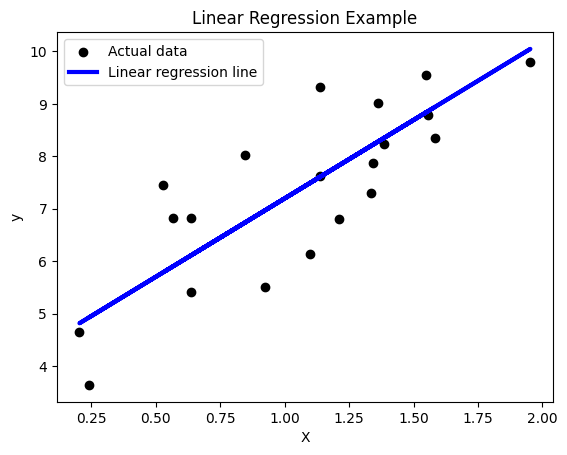

In [9]:
# 绘制结果
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

## 3.2 Ridge回归

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [11]:
# 生成测试数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [12]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 创建Ridge回归模型实例
ridge_reg = Ridge(alpha=1.0)  # alpha是正则化强度

In [14]:
# 训练模型
ridge_reg.fit(X_train, y_train)


Ridge()

In [15]:
# 预测测试集
y_pred = ridge_reg.predict(X_test)


In [16]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 打印模型参数
print(f"Intercept: {ridge_reg.intercept_}")
print(f"Coefficients: {ridge_reg.coef_}")

Mean Squared Error: 0.9127015125504231
Intercept: [4.29889356]
Coefficients: [[2.88928908]]


## 3.3 Lasso回归

In [17]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [18]:
# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 初始化Lasso回归模型
lasso = Lasso(alpha=0.1)

In [20]:
# 训练模型
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [21]:
# 预测测试集结果
y_pred = lasso.predict(X_test)

In [23]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 打印模型系数
print(f"Coefficients: {lasso.coef_}")

# 打印模型截距
print(f"Intercept: {lasso.intercept_}")

Mean Squared Error: 0.0795721731282927
Coefficients: [27.00922616 55.0962804 ]
Intercept: -0.010002385299609173


## 3.4 ElasticNet回归

In [24]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
# 生成回归测试数据
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 创建ElasticNet回归模型实例
# l1_ratio参数决定了L1和L2正则化的混合比例，0.5表示等比例混合
# alpha参数控制正则化的强度
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [27]:
# 拟合模型
elastic_net.fit(X_train, y_train)

ElasticNet()

In [28]:
# 预测测试集
y_pred = elastic_net.predict(X_test)


In [29]:
# 计算测试集上的均方误差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# 查看模型参数
print("Model coefficients:", elastic_net.coef_)
print("Model intercept:", elastic_net.intercept_)

Mean Squared Error on Test Set: 265.08156043502765
Model coefficients: [22.10697287 30.73570613]
Model intercept: -3.7526526974841268


## 3.5 分位数回归

In [30]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [31]:
# 设置随机种子以获得可重复的结果
np.random.seed(0)

# 生成测试数据
n = 100  # 数据点数量
X = np.random.normal(0, 1, n)  # 自变量
beta = 1.5  # 真实系数
e = np.random.normal(0, 1, n)  # 噪声项
Q = np.percentile(e, [25, 50, 75])  # 分位数
e = e + (e < Q[0]) - (e > Q[2])  # 使噪声项的分布偏斜
Y = beta * X + e  # 因变量

In [32]:
# 将数据放入pandas DataFrame中
data = pd.DataFrame({'X': X, 'Y': Y})


In [33]:
# 分位数回归模型
quantiles = [0.25, 0.5, 0.75]  # 我们要估计的分位数
models = {}
results = {}


In [34]:
for qt in quantiles:
    # 使用公式接口定义模型
    models[qt] = smf.quantreg('Y ~ X', data)
    # 拟合模型
    results[qt] = models[qt].fit(q=qt)

In [35]:
# 打印模型结果
for qt in quantiles:
    print(f'Quantile: {qt}')
    print(results[qt].summary())

Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.7167
Model:                       QuantReg   Bandwidth:                      0.5643
Method:                 Least Squares   Sparsity:                        1.618
Date:                Fri, 26 Jan 2024   No. Observations:                  100
Time:                        15:36:18   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2823      0.070     -4.021      0.000      -0.422      -0.143
X              1.5615      0.070     22.423      0.000       1.423       1.700
Quantile: 0.5
                         QuantReg Regression Results                          
Dep. Variable:         